第4章: 形態素解析
=========================

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．


とりあえずmacでやってしまう。

```
$ brew install mecab
$ brew install mecab-ipadic
```

output/neko.txt.mecab　を作成

```
$ mecab resources/neko.txt -o output/neko.txt.mecab
```

In [1]:
#mecab-python
import MeCab

_m = MeCab.Tagger()

with open("resources/neko.txt") as inf:
    with open("resources/neko.txt.mecab", "w") as outf:
        outf.write(_m.parse(inf.read()))


30. 形態素解析結果の読み込み
-----------------------------------------
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．


http://taku910.github.io/mecab/#parse

> 出力フォーマットは, ChaSen のそれと大きく異なります。 左から,
>
> 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音



In [2]:
#全形態素リスト
morphemes_list = []

with open('output/neko.txt.mecab') as f:
    lines = f.readlines()

    #一文の形態素マッピング
    morphemes = []

    for line in lines:
        li = line.split('\t')
        surface = li[0]
        if surface == "EOS\n":
            if morphemes != []:
                morphemes_list.append(morphemes)
                
            morphemes = []
        else:
            l = li[1].split(',')

            dict = {
                "surface": surface,
                "base": l[6],
                "pos": l[0],
                "pos1": l[1]
            }
            morphemes.append(dict)
            
        #    lines.append(morphemes)
        #else:
        #    morphemes.append(line)

#表層形（surface）
#基本形（base）
#品詞（pos）
#品詞細分類1（pos1）
        
        
for i in range(10):
        print(i,":",morphemes_list[i])


0 : [{'pos1': '数', 'surface': '一', 'base': '一', 'pos': '名詞'}]
1 : [{'pos1': '空白', 'surface': '\u3000', 'base': '\u3000', 'pos': '記号'}, {'pos1': '代名詞', 'surface': '吾輩', 'base': '吾輩', 'pos': '名詞'}, {'pos1': '係助詞', 'surface': 'は', 'base': 'は', 'pos': '助詞'}, {'pos1': '一般', 'surface': '猫', 'base': '猫', 'pos': '名詞'}, {'pos1': '*', 'surface': 'で', 'base': 'だ', 'pos': '助動詞'}, {'pos1': '*', 'surface': 'ある', 'base': 'ある', 'pos': '助動詞'}, {'pos1': '句点', 'surface': '。', 'base': '。', 'pos': '記号'}]
2 : [{'pos1': '一般', 'surface': '名前', 'base': '名前', 'pos': '名詞'}, {'pos1': '係助詞', 'surface': 'は', 'base': 'は', 'pos': '助詞'}, {'pos1': '助詞類接続', 'surface': 'まだ', 'base': 'まだ', 'pos': '副詞'}, {'pos1': '自立', 'surface': '無い', 'base': '無い', 'pos': '形容詞'}, {'pos1': '句点', 'surface': '。', 'base': '。', 'pos': '記号'}]
3 : [{'pos1': '空白', 'surface': '\u3000', 'base': '\u3000', 'pos': '記号'}, {'pos1': '代名詞', 'surface': 'どこ', 'base': 'どこ', 'pos': '名詞'}, {'pos1': '格助詞', 'surface': 'で', 'base': 'で', 'pos': '助詞'}, {'pos1': '自立

31. 動詞
-------------------------------------------------------
動詞の表層形をすべて抽出せよ．

32. 動詞の原形
-------------------------------------------------------
動詞の原形をすべて抽出せよ．



In [3]:
verb_surface = [morphemes[0]["surface"] for morphemes in morphemes_list if morphemes[0]["pos"].find("動詞")  == 0]
print(verb_surface[::10])

verb_base = [morphemes[0]["base"] for morphemes in morphemes_list if morphemes[0]["pos"].find("動詞")  == 0]
print(verb_base[::10])


['のみ', '来る', '見る', '詰る', '考える', '考え出す', '抜け', '追付こ', '知っ', '痛む', '煮', '目ざす', 'ここ', '倦ん', '逃げる', '聞い', '帰っ', '鳴かせる', 'ある', 'からかう', 'かよう', '中っ', '足る', 'し', 'のみ', '起きる', '持て余す', '誓っ', 'のみ', '負け', '生じ', '出れ', 'あっ', '坐っ', '飲む', '出']
['のむ', '来る', '見る', '詰る', '考える', '考え出す', '抜ける', '追付く', '知る', '痛む', '煮る', '目ざす', 'こく', '倦む', '逃げる', '聞く', '帰る', '鳴かせる', 'ある', 'からかう', 'かよう', '中る', '足る', 'する', 'のむ', '起きる', '持て余す', '誓う', 'のむ', '負ける', '生じる', '出る', 'ある', '坐る', '飲む', '出る']


33. サ変名詞
-------------------------------------------------------
サ変接続の名詞をすべて抽出せよ．



In [4]:
sa_pos = []

for morphemes in morphemes_list:
    if(morphemes[0]["pos"].find("名詞")  == 0 and  morphemes[0]["pos1"].find("サ変接続")  == 0):
        sa_pos.append(morphemes[0]["surface"]) 

print(sa_pos[::10])



['欠伸', '説明', '卒業', '——', '——', '返答', '是非', '——', '——', '休養', '山盛り', '運動', '左右', '——', '教育', '借金', '心配', '——', '——', 'あくび', '——', '成敗', '——', '往来', '探偵', '心配', '油断']


34. 「AのB」
-------------------------------------------------------
2つの名詞が「の」で連結されている名詞句を抽出せよ．



In [5]:
for i in range(len(morphemes_list)):
    for j in range(len(morphemes_list[i])-1-2):
        w1 = morphemes_list[i][j]
        w2 = morphemes_list[i][j+1]
        w3 = morphemes_list[i][j+3]

        boo1 = w1["pos"].find("名詞") == 0
        boo2 = w2["surface"].find("の") == 0
        boo3 = w3["pos"].find("名詞") == 0
        
        if boo1 and boo2 and boo3:
            print(w1,w2,w3)



{'pos1': '非自立', 'surface': 'もの', 'base': 'もの', 'pos': '名詞'} {'pos1': '格助詞', 'surface': 'の', 'base': 'の', 'pos': '助詞'} {'pos1': '固有名詞', 'surface': '始', 'base': '始', 'pos': '名詞'}
{'pos1': '一般', 'surface': '人間', 'base': '人間', 'pos': '名詞'} {'pos1': '格助詞', 'surface': 'の', 'base': 'の', 'pos': '助詞'} {'pos1': '一般', 'surface': '煙草', 'base': '煙草', 'pos': '名詞'}
{'pos1': '一般', 'surface': '食物', 'base': '食物', 'pos': '名詞'} {'pos1': '格助詞', 'surface': 'の', 'base': 'の', 'pos': '助詞'} {'pos1': '非自立', 'surface': '所', 'base': '所', 'pos': '名詞'}
{'pos1': '一般', 'surface': '隣家', 'base': '隣家', 'pos': '名詞'} {'pos1': '連体化', 'surface': 'の', 'base': 'の', 'pos': '助詞'} {'pos1': '接尾', 'surface': '毛', 'base': '毛', 'pos': '名詞'}
{'pos1': '代名詞', 'surface': '彼', 'base': '彼', 'pos': '名詞'} {'pos1': '連体化', 'surface': 'の', 'base': 'の', 'pos': '助詞'} {'pos1': '非自立', 'surface': '以外', 'base': '以外', 'pos': '名詞'}
{'pos1': '固有名詞', 'surface': 'おさん', 'base': 'おさん', 'pos': '名詞'} {'pos1': '連体化', 'surface': 'の', 'base': 'の', 'pos': '助詞'} {

35. 名詞の連接
-------------------------------------------------------
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．




In [6]:
nouns_list = []

for i in range(len(morphemes_list)):
    nouns = []
    for j in range(len(morphemes_list[i])):
        morphemes = morphemes_list[i][j]
        if morphemes["pos"].find("名詞") == 0:
            nouns.append(morphemes["surface"])
        elif len(nouns) > 0:
            nouns_list.append(nouns)
            nouns = []
            

[print(nouns_list[i]) for i in range(len(nouns_list))]

['吾輩']
['猫']
['名前']
['どこ']
['見当']
['何']
['所']
['ニャーニャー']
['いた事']
['記憶']
['吾輩']
['ここ']
['人間']
['もの']
['あと']
['それ']
['書生']
['人間', '中']
['一番', '獰悪']
['種族']
['そう']
['書生']
['の']
['我々']
['話']
['当時']
['何']
['考']
['彼']
['掌']
['スー']
['時']
['感じ']
['掌']
['上']
['書生']
['顔']
['の']
['人間']
['もの']
['始']
['時', '妙']
['もの']
['感じ']
['今']
['一', '毛']
['装飾']
['はず']
['顔']
['薬缶']
['その後', '猫']
['輪']
['一', '度']
['事']
['顔']
['真中']
['突起']
['穴']
['中']
['ぷうぷうと', '煙']
['咽']
['これ']
['人間']
['煙草']
['もの']
['事']
['頃']
['書生']
['掌']
['裏']
['心持']
['非常']
['速力']
['運転']
['書生']
['の']
['自分']
['の']
['眼']
['胸']
['音']
['眼']
['火']
['それ']
['記憶']
['あと']
['何']
['事']
['気']
['書生']
['たくさん']
['兄弟']
['一疋']
['肝心']
['母親']
['姿']
['上今']
['所']
['眼']
['何']
['容子']
['非常']
['吾輩']
['藁']
['上']
['急']
['笹原']
['中']
['の']
['思い']
['笹原']
['向う']
['池']
['吾輩']
['池']
['前']
['これ']
['分別']
['書生']
['迎']
['ニャー']
['ニャー']
['試み']
['誰']
['池']
['上']
['風']
['日']
['暮れ']
['腹']
['非常']
['声']
['仕方']
['何']
['食物']
['所']
['決心']
['池']
['左']
['非常']
['そこ']
['我慢']
['無理やり']
['事']
['人間']

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

36. 単語の出現頻度
-------------------------------------------------------
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．



In [7]:
from collections import defaultdict
d = defaultdict(int)

for i in range(len(morphemes_list)):
    for j in range(len(morphemes_list[i])):
        morphemes = morphemes_list[i][j]
        if morphemes["pos"].find("名詞") == 0:
            d[morphemes["surface"]] += 1

            
for k, v in sorted(d.items(), key=lambda x:x[1], reverse=True):
    print(v, k)

1611 の
1207 事
981 もの
973 君
932 主人
704 ん
696 よう
602 人
554 一
539 何
481 吾輩
414 これ
381 それ
345 時
343 迷亭
319 ——
319 三
313 ところ
312 方
303 二
294 上
286 寒月
282 顔
280 そう
274 先生
272 人間
268 僕
260 さん
250 気
248 猫
232 中
231 十
213 細君
199 鼻
194 者
175 自分
171 今
169 頭
159 訳
154 前
154 日
154 声
152 うち
149 私
147 男
143 家
142 眼
141 子
140 ため
134 彼
133 誰
131 間
127 所
120 女
119 金田
118 どこ
118 東風
116 今日
112 通り
111 的
108 例
107 口
105 さ
103 馬鹿
102 五
100 心
99 沙弥
99 年
98 四
97 手
96 ここ
96 本
94 度
93 今度
89 大
89 下
88 昔
88 妙
88 大変
86 奴
85 あなた
85 鈴木
84 仙
84 六
83 独
82 学校
82 金
80 あれ
77 話
76 目
74 運動
74 以上
74 彼等
73 もん
73 ヴァイオリン
73 仕方
72 つもり
72 まま
71 物
70 名
70 だい
69 内
69 いや
68 苦
68 ほか
67 右
67 音
66 様
65 八
65 あと
64 みんな
64 教師
63 相違
63 心配
62 黒
62 いつ
62 毛
61 先
60 書斎
60 急
60 候
60 ら
60 敵
59 事件
58 はず
58 足
57 供
57 なに
56 奥さん
56 鼠
55 生徒
55 気の毒
55 泥棒
53 分
53 大分
53 駄目
52 返事
51 逆上
51 驚
51 そこ
50 横
50 真面目
49 一つ
49 屋
49 裏
49 ろ
48 首
48 水
48 娘
47 世の中
47 妻君
47 無理
47 名前
46 せんだって
46 勢
46 不思議
46 体
45 吾
45 七
45 問題
45 頃
45 風
45 博士
44 相手
44 め
44 癖
44 違
44 円
44 

37. 頻度上位10語
-------------------------------------------------------
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．



['の', '事', 'もの', '君', '主人', 'ん', 'よう', '人', '一']
[1611, 1207, 981, 973, 932, 704, 696, 602, 554]


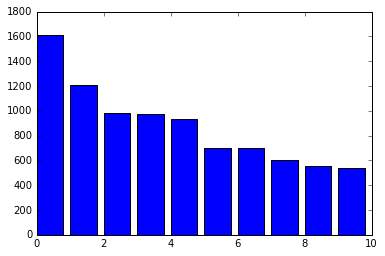

In [14]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []


for k, v in sorted(d.items(), key=lambda x:x[1], reverse=True):
    x.append(k), y.append(v)
    

print(x[0:9])
print(y[0:9])
    
plt.bar(range(10), y[0:10])
plt.show()



38. ヒストグラム
-------------------------------------------------------
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．




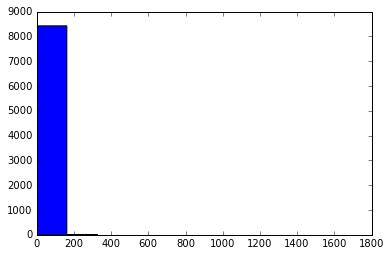

In [21]:
plt.hist(y)
plt.show()

39. Zipfの法則
-------------------------------------------------------
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

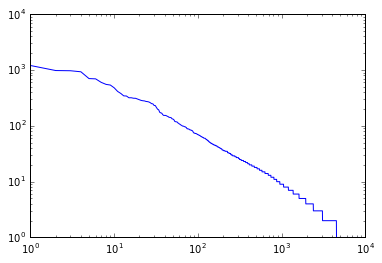

In [22]:
plt.loglog(y)
plt.show()